In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('hello')

hello


In [25]:


#Loading dataset
df = pd.read_csv("clean_dataset.csv")

#untouched copy
df_raw = df.copy()

#basic info on dataset
print("Shape:", df.shape)
print("Duplicate rows:", df.duplicated().sum())

print(df.isna().mean())


df.head()


Shape: (690, 16)
Duplicate rows: 0
Gender            0.0
Age               0.0
Debt              0.0
Married           0.0
BankCustomer      0.0
Industry          0.0
Ethnicity         0.0
YearsEmployed     0.0
PriorDefault      0.0
Employed          0.0
CreditScore       0.0
DriversLicense    0.0
Citizen           0.0
ZipCode           0.0
Income            0.0
Approved          0.0
dtype: float64


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [26]:
print(df.dtypes)

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object


In [27]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0).astype(int)


In [28]:
print(df.dtypes)

Gender              int64
Age                 int64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object


In [30]:
# Summary stats for numerical columns
numeric_summary = df.describe().T
numeric_summary[['mean', '50%', 'std', 'min', 'max']]


,mean,50%,std,min,max
Gender,0.695652,1.00,0.460464,0.0,1.0
Age,31.066667,28.00,11.859906,13.0,80.0
Debt,4.758725,2.75,4.978163,0.0,28.0
Married,0.760870,1.00,0.426862,0.0,1.0
BankCustomer,0.763768,1.00,0.425074,0.0,1.0
YearsEmployed,2.223406,1.00,3.346513,0.0,28.5
PriorDefault,0.523188,1.00,0.499824,0.0,1.0
Employed,0.427536,0.00,0.495080,0.0,1.0
CreditScore,2.400000,0.00,4.862940,0.0,67.0
DriversLicense,0.457971,0.00,0.498592,0.0,1.0


In [31]:
#Correlation with target (Approved)
corr = df.corr(numeric_only=True)['Approved'].sort_values(ascending=False)
print(corr)


Approved          1.000000
PriorDefault      0.720407
Employed          0.458301
CreditScore       0.406410
YearsEmployed     0.322475
Debt              0.206294
BankCustomer      0.188964
Married           0.180583
Income            0.175657
Age               0.165493
DriversLicense    0.031625
Gender           -0.028934
ZipCode          -0.099598
Name: Approved, dtype: float64


In [ ]:
#Approval decisions are strongly driven by financial reliability (PriorDefault, Employment, CreditScore).
#Demographic indicators like Gender show weak direct correlation but could still encode indirect bias through correlated variables like income or credit history.

In [37]:
#group-level approval rate by Gender
approval_by_gender = (
    df.groupby('Gender')['Approved']
      .value_counts(normalize=True)
      .unstack()
      .mul(100)
      .round(2)
)

approval_by_gender.columns = ['Not Approved (%)', 'Approved (%)']
print(approval_by_gender)


        Not Approved (%)  Approved (%)
Gender                                
0                  53.33         46.67
1                  56.46         43.54


In [40]:
#group-level approval rate by marriage
approval_by_marriage= (
    df.groupby('Married')['Approved']
      .value_counts(normalize=True)
      .unstack()
      .mul(100)
      .round(2)
)

approval_by_marriage.columns = ['Not Approved (%)', 'Approved (%)']
print(approval_by_marriage)
print('''we see an implicit bias here, the bank does not necessarily discriminate/approve on the basis of marriage
but it does definitely act as a proxy for financial stability in the dataset''')

         Not Approved (%)  Approved (%)
Married                                
0                   71.52         28.48
1                   50.48         49.52
we see an implicit bias here, the bank does not necessarily discriminate/approve on the basis of marriage
but it does definitely act as a proxy for financial stability in the dataset


In [43]:
#group-level approval rate by marriage
approval_by_bankcust= (
    df.groupby('BankCustomer')['Approved']
      .value_counts(normalize=True)
      .unstack()
      .mul(100)
      .round(2)
)

approval_by_bankcust.columns = ['Not Approved (%)', 'Approved (%)']
print(approval_by_bankcust)
print('naturally, since a bank can assess a previous customer and their credit-worthiness more easily and securely this would be expected')

              Not Approved (%)  Approved (%)
BankCustomer                                
0                        72.39         27.61
1                        50.28         49.72
naturally, since a bank can assess a previous customer and their credit-worthiness more easily and securely this would be expected


In [45]:
# Intersectional Bias Analysis
#Group by Gender and Married
approval_gender_married = (
    df.groupby(['Gender', 'Married','Employed'])['Approved']
      .value_counts(normalize=True)
      .unstack()
      .mul(100)
      .round(2)
)

approval_gender_married.columns = ['Not Approved (%)', 'Approved (%)']
print(approval_gender_married)


                         Not Approved (%)  Approved (%)
Gender Married Employed                                
0      0       0                    83.33         16.67
               1                    36.36         63.64
       1       0                    69.23         30.77
               1                    31.87         68.13
1      0       0                    85.56         14.44
               1                    35.29         64.71
       1       0                    71.57         28.43
               1                    25.79         74.21


In [ ]:
'''Employment remains the strongest equalizer

For both men and women, employment more than quadruples approval likelihood.
That is a very consistent and fair effect — the system values financial stability.

Marriage adds a moderate advantage

Married applicants fare better across both genders — about +15–20% boost in approval probability.
This indicates an implicit bias favoring “stable households.”

Gender gap exists but is subtle
Within identical marital/employment groups, females have slightly lower approval rates (≈5–6% less) than males.
Not a large bias, but consistent across intersections — hinting at mild gender-based disadvantage.

Most disadvantaged cluster
Unmarried, unemployed males have the lowest approval rate overall (~14%).
Unmarried, unemployed females are only marginally better (~17%).

Both groups show that economic inactivity dominates over gender in determining fairness outcomes.'''

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22612\900686280.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


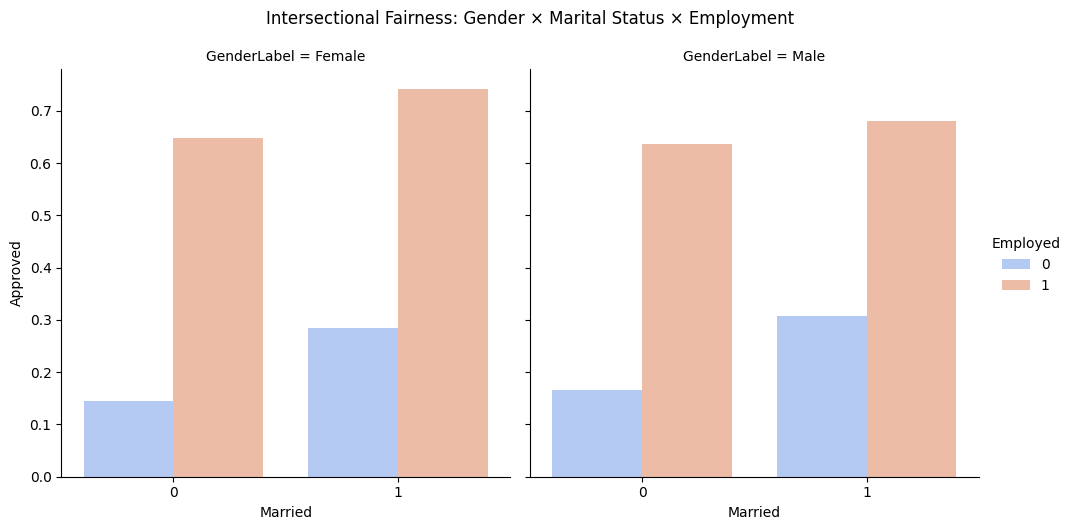

In [47]:
# Replace numeric gender with labels for readability
df['GenderLabel'] = df['Gender'].replace({0: 'Male', 1: 'Female'})

sns.catplot(
    data=df,
    x='Married',
    y='Approved',
    hue='Employed',
    col='GenderLabel',
    kind='bar',
    ci=None,
    palette='coolwarm'
)
plt.suptitle("Intersectional Fairness: Gender × Marital Status × Employment", y=1.05)
plt.show()


In [48]:
#Group by Gender and Married
approval_gender_DL = (
    df.groupby(['Gender', 'DriversLicense','Employed'])['Approved']
      .value_counts(normalize=True)
      .unstack()
      .mul(100)
      .round(2)
)

approval_gender_DL.columns = ['Not Approved (%)', 'Approved (%)']
print(approval_gender_DL)


                                Not Approved (%)  Approved (%)
Gender DriversLicense Employed                                
0      0              0                    72.73         27.27
                      1                    25.00         75.00
       1              0                    73.81         26.19
                      1                    41.30         58.70
1      0              0                    79.47         20.53
                      1                    30.69         69.31
       1              0                    72.06         27.94
                      1                    23.91         76.09


In [49]:
#it can be said that a hidden intersectional bias does exist.
'''Amongst females and  males who both do not have a DL and are not employed either a slight bias can be seen where
females have a greater chance of their loan NOT being approved, by 7%

Amongst females and males who both dont have a DL but are employed, a bias of 5% is seen greater in loan denial for females

Amongst males and females where both have a DL but are not employed, nominal difference is seen

Amongst males and females who have both a DL and are employed stably, males have a greater chance at loan denial.'''

In [52]:
#Group by Gender ONLY for ByOtherMeans Citizens

othermeans = df[df['Citizen'] == 'ByOtherMeans']
approval_BOM_gender = (
    othermeans.groupby(['Gender'])['Approved']
      .value_counts(normalize=True)
      .unstack()
      .mul(100)
      .round(2)
)

approval_BOM_gender.columns = ['Not Approved (%)', 'Approved (%)']
print(approval_BOM_gender)
print('''it can safely be said that a mild disparity exists for a female's loan denial when tested on a group of citizens who
came through different means''')

        Not Approved (%)  Approved (%)
Gender                                
0                  70.00         30.00
1                  74.47         25.53
it can safely be said that a mild disparity exists for a female's loan denial when tested on a group of citizens who
came through different means


In [59]:
#Group by gender and employment ONLY for ByOtherMeans Citizens

approval_BOM_gender_emp = (
    othermeans.groupby(['Gender','Employed'])['Approved']
        .value_counts(normalize=True)
        .unstack()
        .mul(100)
        .round(2)
)

approval_BOM_gender_emp.columns = ['Not Approved (%)', 'Approved (%)']
print(approval_BOM_gender_emp)

print('''we see a stark change in numbers here for the following reason:
among males who are citizens by other means and employed, exists only 1 such sample out of total 50+
among males who are citizens by other means and unemployed, exists 9 samples
among females who are citizens by other means and not employed, nominal difference
interestingly enough, out of femlales who are both employed ''')

print('''
Within the ByOtherMeans citizenship subgroup, the approval outcomes appear inconsistent across gender 
and employment intersections. Although employed males show a 100% approval rate, this is driven by a single sample. 
Among females, approvals are split (50%), with some inconsistencies even among candidates of similar financial reliability.
This points not to proven bias, but to data underrepresentation and decision inconsistency, emphasizing the need for 
larger samples and fairness checks in model training.''')

                 Not Approved (%)  Approved (%)
Gender Employed                                
0      0                    77.78         22.22
       1                      NaN        100.00
1      0                    75.56         24.44
       1                    50.00         50.00
we see a stark change in numbers here for the following reason:
among males who are citizens by other means and employed, exists only 1 such sample out of total 50+
among males who are citizens by other means and unemployed, exists 9 samples
among females who are citizens by other means and not employed, nominal difference
interestingly enough, out of femlales who are both employed 

Within the ByOtherMeans citizenship subgroup, the approval outcomes appear inconsistent across gender 
and employment intersections. Although employed males show a 100% approval rate, this is driven by a single sample. 
Among females, approvals are split (50%), with some inconsistencies even among candidates of similar fina